In [ ]:
#####TASK 7: Get Basic Sales Summary from a Tiny SQLite Database using Python
##Objective: Use SQL inside Python to pull simple sales info (like total quantity sold, total revenue), and
### display it using basic print statements and a simple bar chart.


Sales Summary:
   product  total_qty  revenue
0   Apples         15      7.5
1  Bananas         27      8.1
2   Grapes         30     36.0
3  Oranges         12      8.4


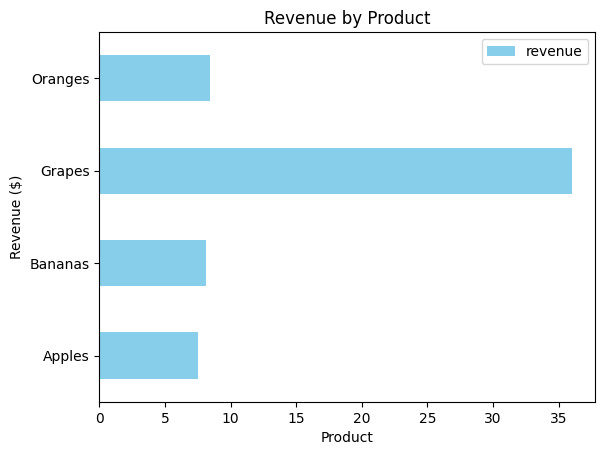

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Create the SQLite database & table
# ------------------------------
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales") ### we use cursor.execute for run sql query
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# insert sample data
sample_data = [
    ('Apples', 10, 0.5),
    ('Bananas', 15, 0.3),
    ('Oranges', 8, 0.7),
    ('Apples', 5, 0.5),
    ('Bananas', 12, 0.3),
    ('Grapes', 20, 1.2),
    ('Oranges', 4, 0.7),
    ('Grapes', 10, 1.2)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()

# ------------------------------
# 2. Run sales summary query into pandas DataFrame
# ------------------------------
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# ------------------------------
# 3. Print results
# ------------------------------
print("Sales Summary:")
print(df)


# 4. Plot bar chart with matplotlib

df.plot(kind='barh', x='product', y='revenue', color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.show()

conn.close()


In [ ]:
## again second query

task = sqlite3.connect('sales_data.db')

subbu ='select id,product from sales'
df = pd.read_sql_query(subbu,task)
print(df)



   id  product
0   1   Apples
1   2  Bananas
2   3  Oranges
3   4   Apples
4   5  Bananas
5   6   Grapes
6   7  Oranges
7   8   Grapes


In [ ]:
### so this task 7 done successfully

In [ ]:
df['product'].value_counts()

,count
product,
Apples,2
Bananas,2
Oranges,2
Grapes,2


In [ ]:
df['product'].nunique()

4